# About Dataset

**Context**

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

**Content**

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

**Acknowledgements**

This dataset is free and is publicly available at the UCI Machine Learning Repository

# Imports

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.pipeline import Pipeline

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Data cleaning and preparation

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Checking duplicates

In [4]:
df.duplicated().sum()

np.int64(3)

In [5]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [6]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica
146,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Checking categorical variables

In [8]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# EDA

## Statistical summary

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.describe(include=['object'])

,species
count,147
unique,3
top,Iris-versicolor
freq,50


## Distribution and boxplot of numerical variables

In [11]:
def create_distribution_boxplot(data, column):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Histogram
    sns.histplot(data=data, x=column, color='indianred', ax=axes[0], kde=True)
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')

    # Boxplot
    sns.boxplot(data=data, y=column, color='indianred', ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('')

    plt.suptitle(column, fontsize=16)
    plt.tight_layout()
    plt.show()

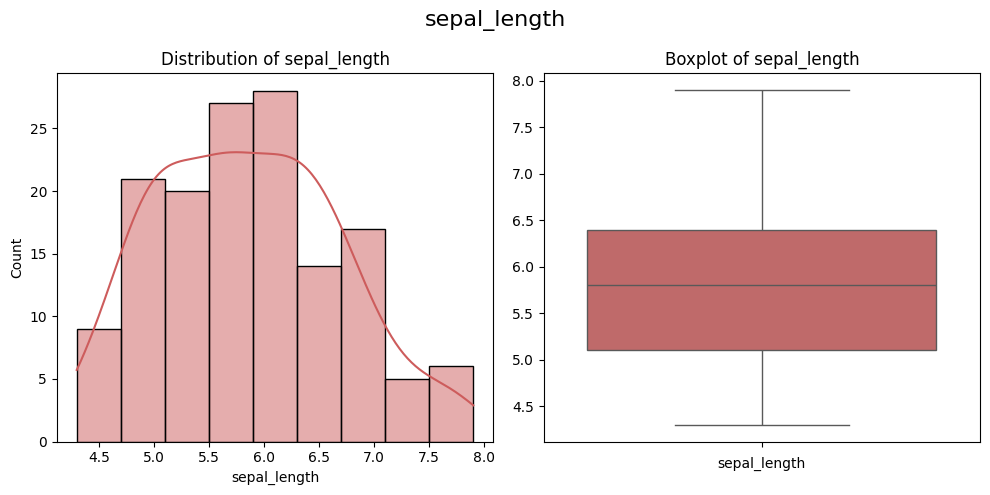

In [12]:
create_distribution_boxplot(df, 'sepal_length')

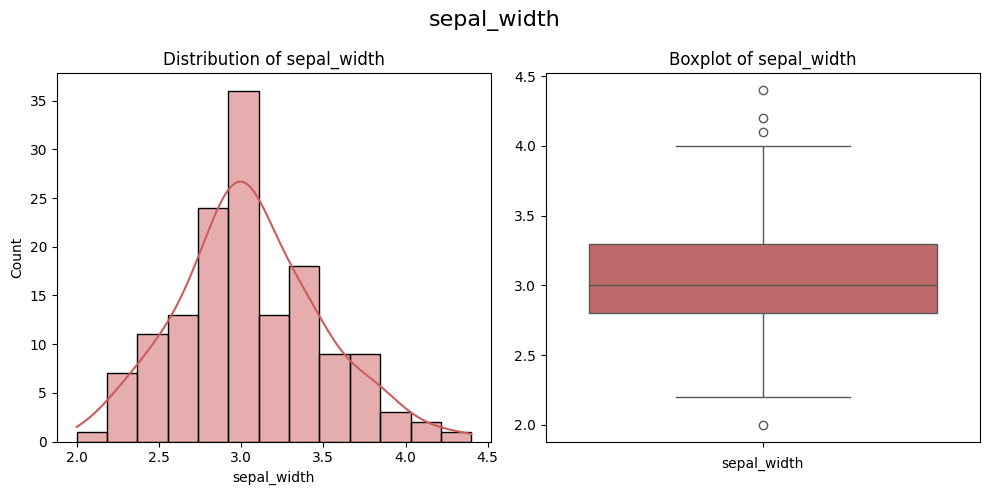

In [13]:
create_distribution_boxplot(df, 'sepal_width')

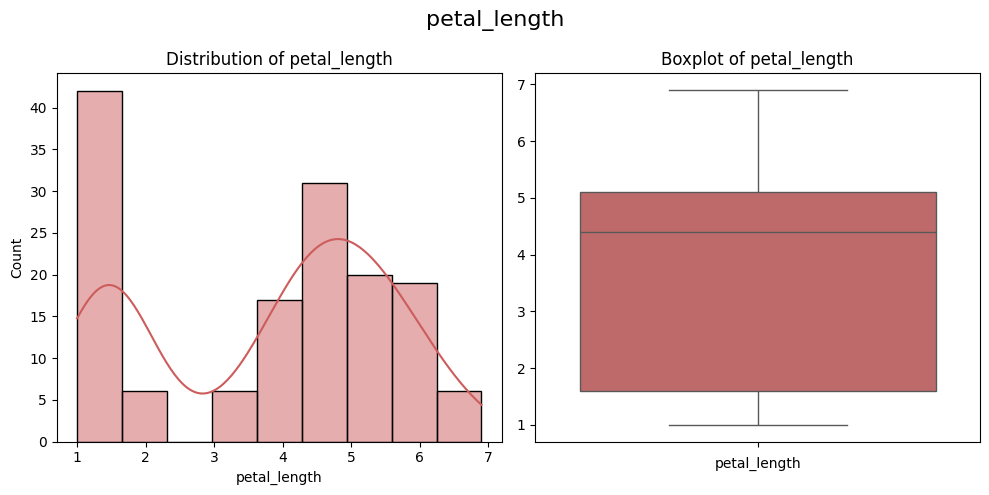

In [14]:
create_distribution_boxplot(df, 'petal_length')

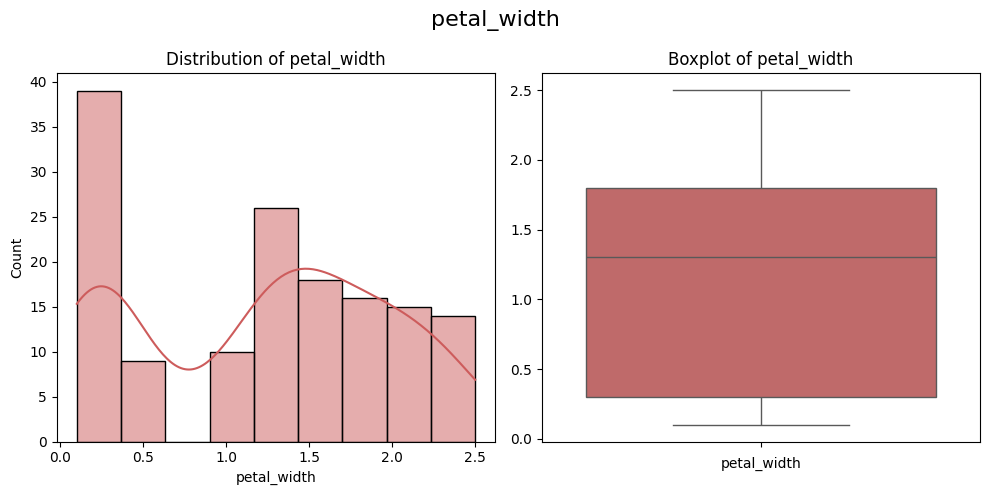

In [15]:
create_distribution_boxplot(df, 'petal_width')

## Distribution of categorical variables

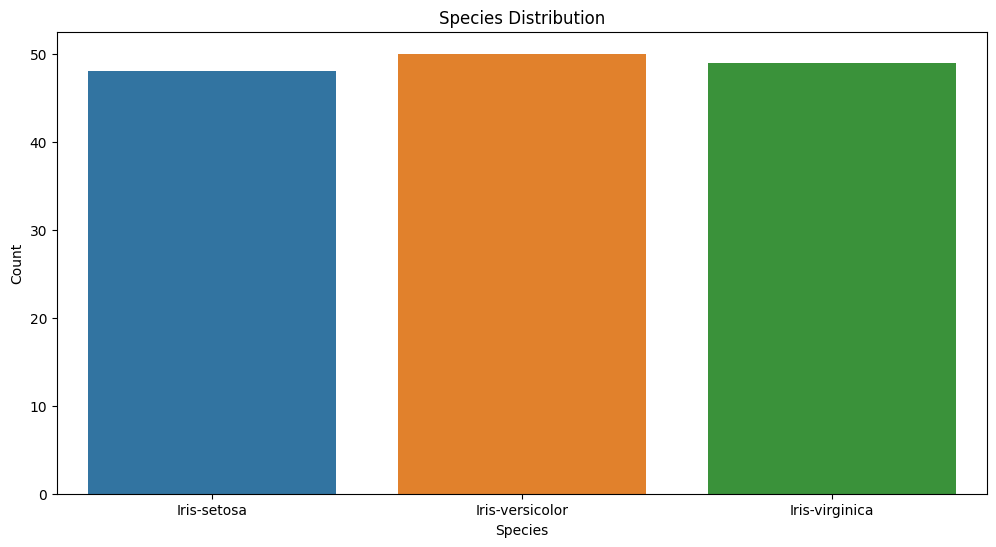

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='species', hue='species')
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

## Correlation

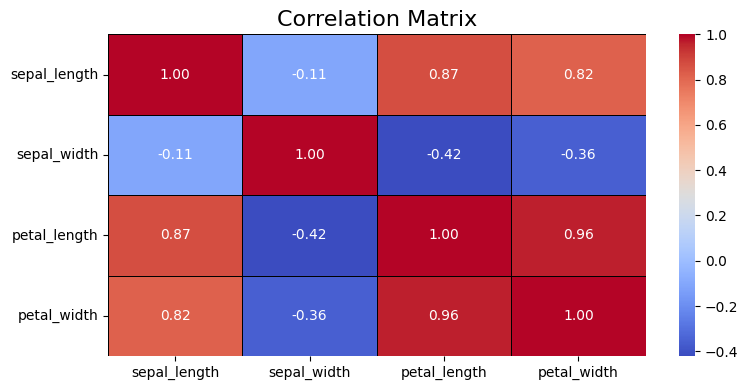

In [17]:
corr_matrix = df.drop(labels='species',axis=1).corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

plt.title('Correlation Matrix', fontsize=16)
plt.yticks(rotation=0)

plt.tight_layout()  
plt.show()

<Figure size 1000x800 with 0 Axes>

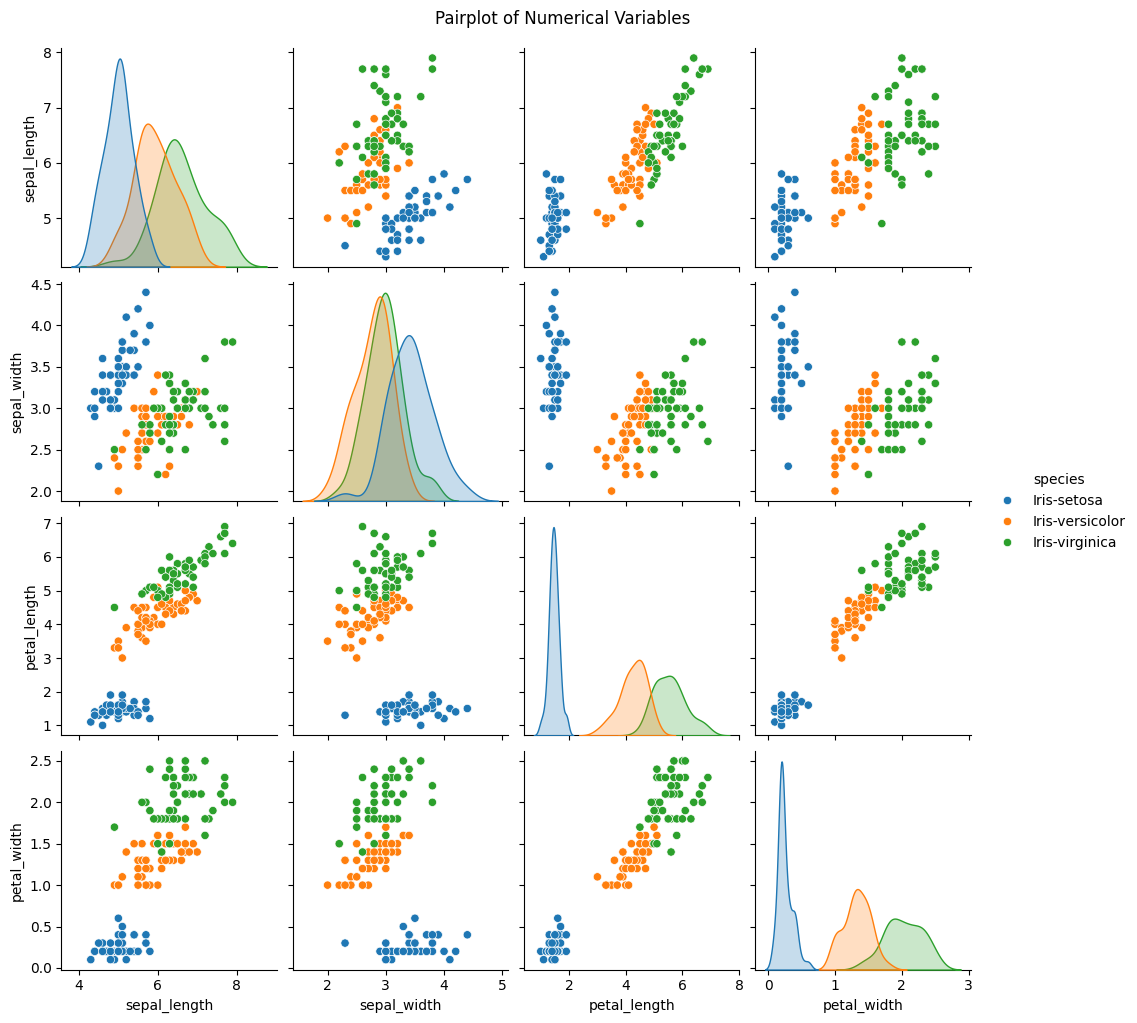

In [18]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species')

plt.suptitle('Pairplot of Numerical Variables', y=1.02)

plt.show()

## Relationship between species and variables

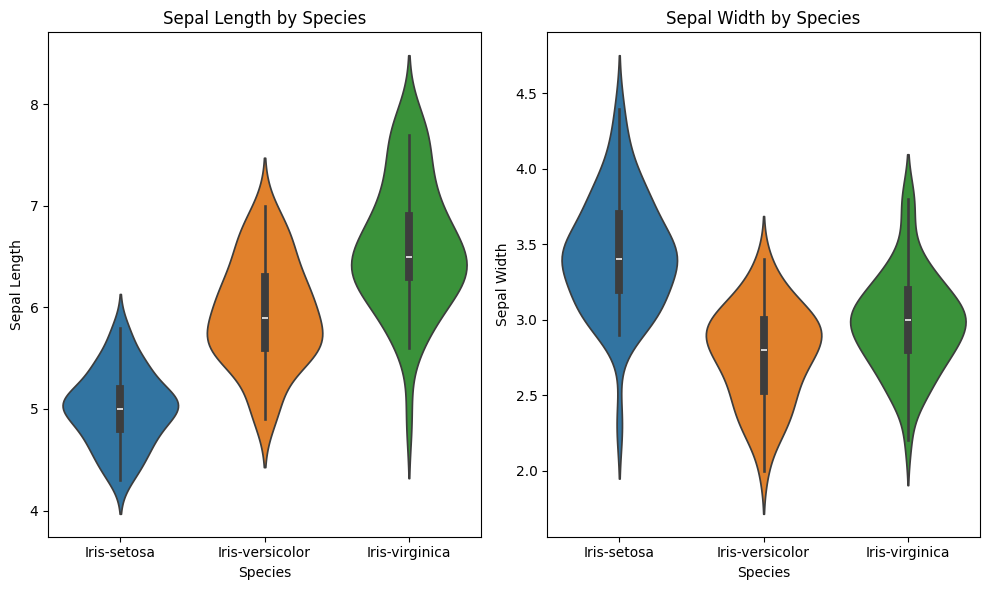

In [19]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=df, y='sepal_length', x='species', hue='species')
plt.title('Sepal Length by Species')
plt.ylabel('Sepal Length')
plt.xlabel('Species')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, y='sepal_width', x='species', hue='species')
plt.title('Sepal Width by Species')
plt.ylabel('Sepal Width')
plt.xlabel('Species')

plt.tight_layout()
plt.show()

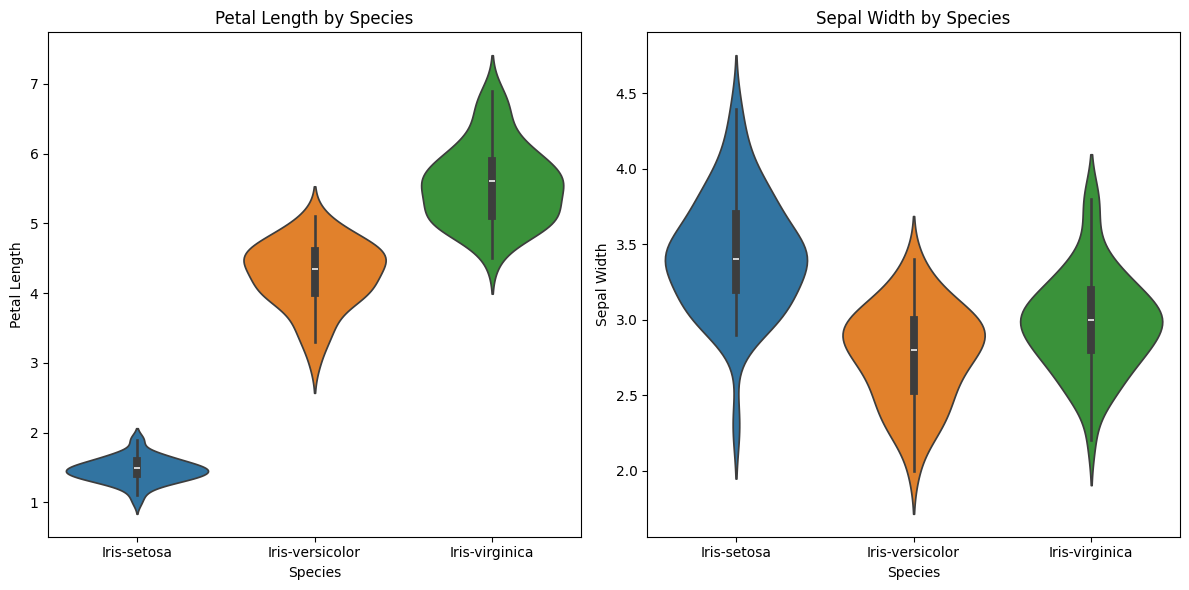

In [20]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.violinplot(data=df, y='petal_length', x='species', hue='species')
plt.title('Petal Length by Species')
plt.ylabel('Petal Length')
plt.xlabel('Species')


plt.subplot(1, 2, 2)
sns.violinplot(data=df, y='sepal_width', x='species', hue='species')
plt.title('Sepal Width by Species')
plt.ylabel('Sepal Width')
plt.xlabel('Species')

plt.tight_layout()
plt.show()

## Outlier Detection

In [45]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return lower_bound, upper_bound, outliers

# Identificar e imprimir outliers para cada coluna numérica
for column in ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']:
    lower_bound, upper_bound, outliers = identify_outliers(df, column)
    print(f"\n{column}:")
    print("Limite Inferior:", lower_bound)
    print("Limite Superior:", upper_bound)
    print("\nOutliers identificados:")
    print(outliers[[column]])


petal_length:
Limite Inferior: -3.649999999999999
Limite Superior: 10.349999999999998

Outliers identificados:
Empty DataFrame
Columns: [petal_length]
Index: []

petal_width:
Limite Inferior: -1.95
Limite Superior: 4.05

Outliers identificados:
Empty DataFrame
Columns: [petal_width]
Index: []

sepal_length:
Limite Inferior: 3.1499999999999986
Limite Superior: 8.350000000000001

Outliers identificados:
Empty DataFrame
Columns: [sepal_length]
Index: []

sepal_width:
Limite Inferior: 2.05
Limite Superior: 4.05

Outliers identificados:
    sepal_width
15          4.4
32          4.1
33          4.2
58          2.0


In [21]:
z_scores = stats.zscore(df.drop('species', axis=1))
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
print(outliers.sum())

0


# Modeling

## Pre-processing

In [58]:
X = df.drop('species', axis=1)
y = df['species']

In [50]:
#label_ecoder = LabelEncoder()
#y = label_ecoder.fit_transform(y)

In [59]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

## Baseline

In [60]:
dummy = DummyClassifier()
dummy.fit(X, y)

print(f"{round(dummy.score(X_test, y_test),1) * 100}%")

30.0%


## Models

In [61]:
pipelines = [
    ('Logistic Regression', Pipeline([
        ('preprocessing', StandardScaler()),  
        ('model', LogisticRegression(random_state=55))
    ])),
    ('KNN', Pipeline([
        ('preprocessing', MinMaxScaler()),  
        ('model', KNeighborsClassifier())
    ])),
    ('Decision Tree', Pipeline([
        ('model', DecisionTreeClassifier(max_depth=5, random_state=55))  
    ])),
    ('Support Vector Machine', Pipeline([
        ('preprocessing', StandardScaler()),  
        ('model', SVC(random_state=55))
    ])),
    ('Random Forest', Pipeline([
        ('model', RandomForestClassifier(max_depth=5, random_state=55))  
    ])),
    ('Naive Bayes', Pipeline([
        ('model', GaussianNB())
    ])),
    ('Gradient Boosting', Pipeline([
        ('model', GradientBoostingClassifier(random_state=55))
    ]))
]

## Validation

In [62]:
results = []

for name, pipeline in pipelines:

    kf = KFold(n_splits = 5, shuffle = True, random_state = 55)
    scores = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy')
    
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'CrossValidation_Accuracy_Mean': scores.mean(),
        'Test_Accuracy': test_accuracy
    })

results_df = pd.DataFrame(results)
results_df

,Model,CrossValidation_Accuracy_Mean,Test_Accuracy
0,Logistic Regression,0.948913,0.900000
1,KNN,0.948551,0.966667
2,Decision Tree,0.897826,0.933333
3,Support Vector Machine,0.957609,0.966667
4,Random Forest,0.948551,0.933333
5,Naive Bayes,0.965580,0.900000
6,Gradient Boosting,0.974275,0.933333


## Avaliation

SVM
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



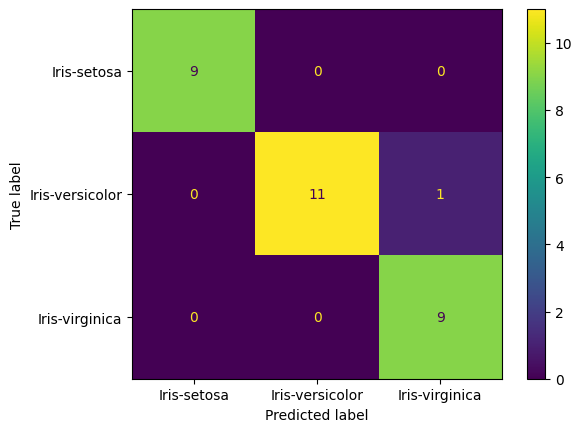

In [64]:
pipelines[3][1].fit(X, y)
y_pred = pipelines[3][1].predict(X_test)

print("SVM")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)